In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

In [2]:
#create dataframes from csv files

peptides = pd.read_csv("PD-datasets/train_peptides.csv")
proteins = pd.read_csv("PD-datasets/train_proteins.csv")
clinical = pd.read_csv("PD-datasets/train_clinical_data.csv")

# EDA

To begin our data exploration we will look at the example of one patient in all 3 datasets. First, let's track the progression of the patient's disease as measured by Unified Parkinson's Disease Rating Scale (UPDRS). The UPDRS is composed of 4 parts, which measure the different impacts of the disease on a patient's health. 

In [68]:
patients = clinical.patient_id.unique()

In [69]:
r = random.randrange(len(patients))

In [70]:
patient_x = clinical.loc[clinical['patient_id']==patients[r],:]

Text(0.5, 1.0, 'Patient 247 UPDRS Over Time')

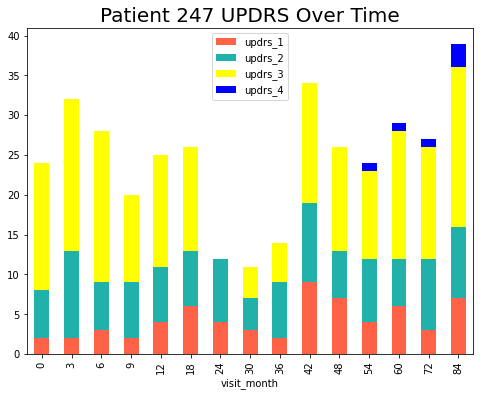

In [71]:
ax = patient_x[["visit_month","updrs_1","updrs_2","updrs_3","updrs_4"]].plot.bar(x='visit_month', stacked=True, color=['tomato','lightseagreen','yellow','blue'], figsize=(8,6))
ax.set_title(f'Patient {r} UPDRS Over Time', fontsize=20)

We have two other datasets that provide context to the patients' disease progression. In addition to the UPDRS, protein measurements were taken at every visit. 

Our protein dataset tells us which proteins are present, and in what concentration (NPX).

The peptides dataset tells us what those proteins are composed of.

In [72]:
proteins_x = proteins.loc[proteins['patient_id']==patients[r],:]
peptides_x = peptides.loc[peptides['patient_id']==patients[r],:]

proteins_peptides_x = pd.merge(left=proteins_x,right=peptides_x,how='outer',on=['visit_id', 'visit_month', 'patient_id'])
proteins_peptides_x.head()

,visit_id,visit_month,patient_id,UniProt_x,NPX,UniProt_y,Peptide,PeptideAbundance
0,65043_0,0,65043,O00391,13472.4,O00391,NEQEQPLGQWHLS,13472.4
1,65043_0,0,65043,O00391,13472.4,O00533,GNPEPTFSWTK,158777.0
2,65043_0,0,65043,O00391,13472.4,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,51184.3
3,65043_0,0,65043,O00391,13472.4,O00533,SMEQNGPGLEYR,55708.4
4,65043_0,0,65043,O00391,13472.4,O00533,TLKIENVSYQDKGNYR,53159.7


In [75]:
visits = proteins_peptides_x.visit_id.unique()
v = random.choice(visits)

In [76]:
v

'65043_0'

In [77]:
visit_x = proteins_peptides_x.loc[proteins_peptides_x['visit_id']==v,:]

In [78]:
visit_x

,visit_id,visit_month,patient_id,UniProt_x,NPX,UniProt_y,Peptide,PeptideAbundance
0,65043_0,0,65043,O00391,13472.4,O00391,NEQEQPLGQWHLS,13472.4
1,65043_0,0,65043,O00391,13472.4,O00533,GNPEPTFSWTK,158777.0
2,65043_0,0,65043,O00391,13472.4,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,51184.3
3,65043_0,0,65043,O00391,13472.4,O00533,SMEQNGPGLEYR,55708.4
4,65043_0,0,65043,O00391,13472.4,O00533,TLKIENVSYQDKGNYR,53159.7
...,...,...,...,...,...,...,...,...
191515,65043_0,0,65043,Q9Y6R7,35617.5,Q9UHG2,ILAGSADSEGVAAPR,249512.0
191516,65043_0,0,65043,Q9Y6R7,35617.5,Q9UKV8,SGNIPAGTTVDTK,37584.6
191517,65043_0,0,65043,Q9Y6R7,35617.5,Q9Y646,LALLVDTVGPR,28346.5
191518,65043_0,0,65043,Q9Y6R7,35617.5,Q9Y6R7,AGC(UniMod_4)VAESTAVC(UniMod_4)R,12057.7


In [ ]:
plt.style.use('_mpl-gallery-nogrid')


# make data
x = visit_x["PeptideAbundance"]
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))

# plot
fig, ax = plt.subplots()
ax.pie(x, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))

fig.set_size_inches(8, 8)
plt.show()

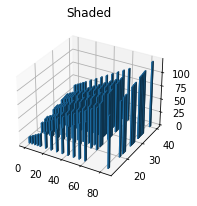

In [19]:
# set up the figure and axes
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')

# fake data
_x = patient_x["visit_month"]
_y = patient_x["updrs_3"]
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = x + y
bottom = np.zeros_like(top)
width = depth = 1

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('Shaded')

plt.show()